<a href="https://colab.research.google.com/github/Arjun-RY/Predicting_Insurance_Claim_Filing_behavior_of_Policyholders/blob/main/Predicting_Insurance_Claim_Filing_behavior_of_Policyholders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.metrics import classification_report,roc_auc_score,ConfusionMatrixDisplay

%matplotlib inline

In [2]:
df = pd.read_csv('train.csv', index_col=False)
df.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,...,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,...,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [4]:
df.describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


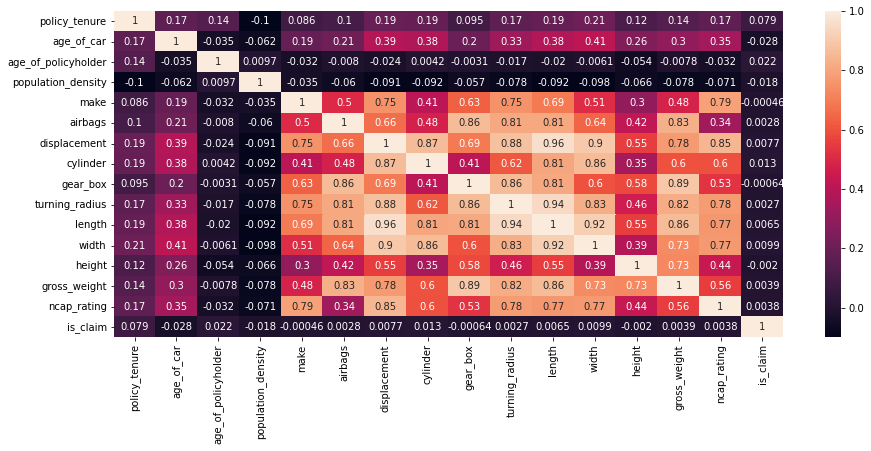

In [5]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

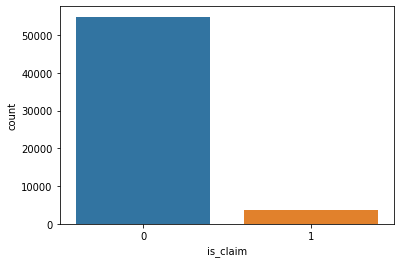

In [6]:
sns.countplot(x='is_claim',data=df)

In [7]:
df['is_claim'].value_counts()

0    54844
1     3748
Name: is_claim, dtype: int64

In [13]:
df.replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

In [15]:
df.nunique()

policy_id                           58592
policy_tenure                       58592
age_of_car                             49
age_of_policyholder                    75
area_cluster                           22
population_density                     22
make                                    5
segment                                 6
model                                  11
fuel_type                               3
max_torque                              9
max_power                               9
engine_type                            11
airbags                                 3
is_esc                                  2
is_adjustable_steering                  2
is_tpms                                 2
is_parking_sensors                      2
is_parking_camera                       2
rear_brakes_type                        2
displacement                            9
cylinder                                2
transmission_type                       2
gear_box                          

In [16]:
df=df.drop(['policy_id'],axis=1)

In [18]:

text_cols=df.select_dtypes(include='object').columns
df1=pd.get_dummies(df,columns=text_cols,prefix=text_cols)

In [19]:
df1

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,...,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,rear_brakes_type_Disc,rear_brakes_type_Drum,transmission_type_Automatic,transmission_type_Manual,steering_type_Electric,steering_type_Manual,steering_type_Power
0,0.515874,0.05,0.644231,4990,1,2,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
1,0.672619,0.02,0.375000,27003,1,2,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
2,0.841110,0.02,0.384615,4076,1,2,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
3,0.900277,0.11,0.432692,21622,1,2,1,1,0,1,...,0,0,0,0,1,1,0,1,0,0
4,0.596403,0.11,0.634615,34738,2,2,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58587,0.355089,0.13,0.644231,8794,2,2,0,0,0,0,...,0,0,0,0,1,1,0,1,0,0
58588,1.199642,0.02,0.519231,7788,1,2,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
58589,1.162273,0.05,0.451923,34738,1,2,0,0,0,1,...,0,0,0,0,1,0,1,0,0,1
58590,1.236307,0.14,0.557692,8794,1,2,0,1,0,1,...,1,0,0,0,1,0,1,1,0,0


In [23]:
X=df1.drop(['is_claim'],axis=1)
y=df1['is_claim']

In [24]:

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


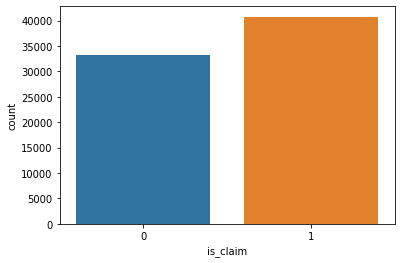

In [28]:
sns.countplot(y_smt)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X_smt,y_smt,test_size=0.2,random_state=10)

models = {'Logistic Regression': LogisticRegression(),
          'Decision Tree': DecisionTreeClassifier(),
          'Random Forest': RandomForestClassifier(),
          'Gradient Boosting': GradientBoostingClassifier(),
          'XGBoost': XGBClassifier(),
          'AdaBoost': AdaBoostClassifier()}

# Train and evaluate the models using train-test split
print("ROC-AUC scores and confusion matrices using train-test split")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} ROC-AUC score: {roc_auc_score(y_test, y_pred)}')
    print(f'{name} Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n\n')

# Train and evaluate the models using cross-validation
print("ROC-AUC scores using cross-validation")
for name, model in models.items():
  if name=='Logistic Regression':
    continue
  else:
    cv_score = cross_val_score(model, X_smt, y_smt, cv=5, scoring='roc_auc')
    print(f'{name} ROC-AUC score: {np.mean(cv_score)}')

ROC-AUC scores and confusion matrices using train-test split
Logistic Regression ROC-AUC score: 0.5165250140487402
Logistic Regression Confusion Matrix: 
 [[ 678 5929]
 [ 569 7610]]


Decision Tree ROC-AUC score: 0.9292031020832441
Decision Tree Confusion Matrix: 
 [[6035  572]
 [ 450 7729]]


Random Forest ROC-AUC score: 0.9646976766796908
Random Forest Confusion Matrix: 
 [[6315  292]
 [ 216 7963]]


Gradient Boosting ROC-AUC score: 0.8579348563703095
Gradient Boosting Confusion Matrix: 
 [[5439 1168]
 [ 878 7301]]


XGBoost ROC-AUC score: 0.8546862095174727
XGBoost Confusion Matrix: 
 [[5430 1177]
 [ 920 7259]]


AdaBoost ROC-AUC score: 0.7180833411965319
AdaBoost Confusion Matrix: 
 [[4150 2457]
 [1570 6609]]


ROC-AUC scores using cross-validation
Decision Tree ROC-AUC score: 0.926550729976119
Random Forest ROC-AUC score: 0.9950506951811695
Gradient Boosting ROC-AUC score: 0.9445962821055908
XGBoost ROC-AUC score: 0.9392639053469528
AdaBoost ROC-AUC score: 0.7977357879598702


In [39]:
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cv_score = cross_val_score(rf, X_smt, y_smt, cv=5, scoring='roc_auc')
print('Random Forest Classifier')
print(f'ROC-AUC score: {np.mean(cv_score)}')
importance = rf.feature_importances_
for feature, importance in zip(X.columns,importance):
  print(f'{feature} : {importance}')

Random Forest Classifier
ROC-AUC score: 0.995150313627802
policy_tenure : 0.3397068095213336
age_of_car : 0.27028789019681565
age_of_policyholder : 0.24056514853761876
population_density : 0.031434471030276676
make : 0.000667762863113171
airbags : 0.0007556500492231831
is_esc : 0.00037559856545901483
is_adjustable_steering : 0.0005981722700438031
is_tpms : 0.00017851969726676375
is_parking_sensors : 0.0003498797940719848
is_parking_camera : 0.0005509115039306097
displacement : 0.001955279416798674
cylinder : 0.000674194369929971
gear_box : 0.00021554102158297225
turning_radius : 0.0018003365586773902
length : 0.0023090188503755776
width : 0.0028529790536504914
height : 0.0022405898693345083
gross_weight : 0.0017806184136230788
is_front_fog_lights : 0.0005102832641351715
is_rear_window_wiper : 0.00036074974550470023
is_rear_window_washer : 0.00029537465225208166
is_rear_window_defogger : 0.0003593961252901377
is_brake_assist : 0.0004645211077898428
is_power_door_locks : 0.00039118601631

In [42]:
X=df1.loc[:,['policy_tenure','age_of_car','age_of_policyholder','population_density']]
y=df1['is_claim']

In [43]:

smt = SMOTEENN(sampling_strategy='all')
X_smt, y_smt = smt.fit_resample(X, y)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


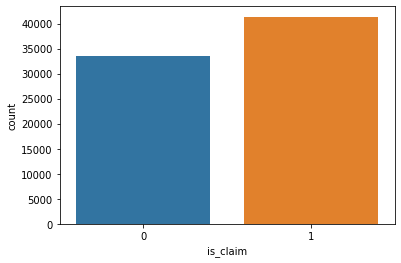

In [44]:
sns.countplot(y_smt)

In [46]:
rf=RandomForestClassifier(random_state=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
cv_score = cross_val_score(rf, X_smt, y_smt, cv=5, scoring='roc_auc')
print('Random Forest Classifier')
print(f'ROC-AUC score: {np.mean(cv_score)}')

Random Forest Classifier
ROC-AUC score: 0.990303512716596
